##  Q1. 3 Datasets:
- MNIST
- Spambase
- 20NG

For each, perform 2 classification algorithms:
- L2-reg Logistic Regression
- Decision Trees


allowed to use library for classification. 

allowed to use library to process data in appropriate formats.

You are required to explain/analyze the model trained in terms of features : for each of the 6 runs list the top F=30 features. 

For the Regression these correspond to the highest-absolute-value F coefficients; 

for Decision Tree they are the first F splits. In particular for Decision Tree on 20NG, report performance for two tree sizes ( by depths of the tree, or number of leaves, or number of splits )

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
from sklearn.datasets import _twenty_newsgroups
from torchvision import datasets, transforms

# MNIST

In [124]:
# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())
features = mnist_dataset.data
labels = mnist_dataset.targets

# Normalize the features
features = features / 255.0

In [125]:
# using pytorch to perform logistic regression:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
# Initialize the model, loss function, and optimizer
input_dim = 28 * 28  # MNIST images are 28x28 pixels
output_dim = 10  # 10 classes for digits 0-9
model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Prepare the data for training
features = features.view(-1, input_dim).float()
labels = labels.long()

# Training loop
num_epochs = 5
batch_size = 64
num_batches = len(features) // batch_size
for epoch in range(num_epochs):
    for i in range(num_batches):
        # Get the batch data
        batch_features = features[i * batch_size:(i + 1) * batch_size]
        batch_labels = labels[i * batch_size:(i + 1) * batch_size]
        
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(num_batches):
        batch_features = features[i * batch_size:(i + 1) * batch_size]
        batch_labels = labels[i * batch_size:(i + 1) * batch_size]
        
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
    accuracy = correct / total
print(f'Accuracy of the model on the MNIST test images: {accuracy * 100:.2f}%')


Epoch [1/5], Loss: 2.0140
Epoch [2/5], Loss: 1.9131
Epoch [3/5], Loss: 1.8599
Epoch [4/5], Loss: 1.8256
Epoch [5/5], Loss: 1.8010
Accuracy of the model on the MNIST test images: 83.93%


In [126]:
# Analyze model in terms of features, d = top 30 features
def analyze_model(model, input_dim):
    weights = model.linear.weight.data.numpy()
    top_features = np.argsort(np.abs(weights), axis=1)[:, -30:]  # Get top 30 features for each class
    return top_features
top_features = analyze_model(model, input_dim)

print("Top 30 features for each class:")
for i in range(output_dim):
    print(f"Class {i}: {top_features[i]}")

# These features mean that these are the most significant pixels, that when colored in (0 to 28*28 = 784) will have the most impact on the model's prediction towards these classes. 


Top 30 features for each class:
Class 0: [410 357 464 489 518 377 353 488 437 409 460 432 491 462 352 406 380 463
 378 405 379 490 436 461 408 381 435 433 407 434]
Class 1: [431 354 464 437 291 436 461 466 494 410 263 402 381 374 403 294 375 434
 379 433 295 409 322 489 462 351 350 406 378 323]
Class 2: [126 321 371 629 294 264 124 401 349 292 317 290 152 659 541 318 350 319
 372 291 658 657 373 320 656 374 345 348 346 347]
Class 3: [265 572 316 543 289 485 544 264 351 461 542 376 514 318 491 545 263 460
 487 463 290 488 515 291 517 490 489 462 518 516]
Class 4: [455 431 399 184 154 236 625 572 209 571 212 267 570 183 266 402 437 597
 436 427 430 428 182 401 238 400 429 239 210 211]
Class 5: [217 515 357 219 190 486 402 403 516 220 488 485 298 218 319 320 489 247
 356 354 328 327 348 376 374 347 355 325 375 326]
Class 6: [655 485 101 571 325 626 216 542 656 513 627 515 297 268 240 272 659 514
 657 299 271 296 215 242 241 269 214 543 243 270]
Class 7: [181 264 267 157 434 184 155 378 45

In [127]:
# Using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist_dataset_train = datasets.MNIST(root='data', train = True, download=True)

mnist_dataset = datasets.MNIST(root='data', train = False, download=True)
print(mnist_dataset_train.data.shape)
print(mnist_dataset.data.shape)
# Train features, labels
features = mnist_dataset_train.data
labels = mnist_dataset_train.targets

# Test features, labels
test_features = mnist_dataset.data
test_labels = mnist_dataset.targets

# convert to numpy arrays:
features = features.numpy()
labels = labels.numpy()

test_features = test_features.numpy()
test_labels = test_labels.numpy()

# Normalize the features
features = features / 255.0
test_features = test_features / 255.0

# Reshape the features to 2D array
features = features.reshape(features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt_classifier.fit(features, labels)

# Predict on the testing set
dt_predictions = dt_classifier.predict(test_features)

# Calculate accuracy
dt_accuracy = accuracy_score(test_labels, dt_predictions)
print(f'Accuracy of the Decision Tree Classifier on the MNIST dataset: {dt_accuracy * 100:.2f}%')



torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
Accuracy of the Decision Tree Classifier on the MNIST dataset: 87.67%


In [128]:
# Analyze the decision tree model
def analyze_decision_tree(model, input_dim):
    # Get the feature importances
    importances = model.feature_importances_
    # Get the indices of the top 30 features
    top_features = np.argsort(importances)[-30:]
    return top_features
top_features = analyze_decision_tree(dt_classifier, input_dim)
print("Top 30 features for the Decision Tree Classifier:")
for i in range(output_dim):
    print(f"Class {i}: {top_features[i]}")

Top 30 features for the Decision Tree Classifier:
Class 0: 376
Class 1: 95
Class 2: 514
Class 3: 297
Class 4: 296
Class 5: 267
Class 6: 348
Class 7: 658
Class 8: 381
Class 9: 101


In [129]:
# Analyze the decision tree model's first 30 splits:
def analyze_decision_tree_splits(model, input_dim):
    # Get the tree structure
    tree = model.tree_
    # Get the feature indices used for the first 30 splits
    feature_indices = tree.feature[:30]
    return feature_indices
top_splits = analyze_decision_tree_splits(dt_classifier, input_dim)
print("First 30 splits in the Decision Tree Classifier:")
for i in range(len(top_splits)):
    if top_splits[i] != -2:  # -2 indicates a leaf node
        print(f"Split {i+1}: Feature {top_splits[i]}")


First 30 splits in the Decision Tree Classifier:
Split 1: Feature 350
Split 2: Feature 568
Split 3: Feature 430
Split 4: Feature 405
Split 5: Feature 484
Split 6: Feature 153
Split 7: Feature 594
Split 8: Feature 156
Split 9: Feature 554
Split 10: Feature 159
Split 11: Feature 377
Split 12: Feature 457
Split 13: Feature 511
Split 14: Feature 461
Split 15: Feature 639
Split 16: Feature 151
Split 17: Feature 609
Split 18: Feature 500
Split 19: Feature 350
Split 20: Feature 675
Split 21: Feature 695
Split 22: Feature 388
Split 23: Feature 263
Split 24: Feature 691
Split 25: Feature 434
Split 26: Feature 303
Split 27: Feature 607
Split 28: Feature 255
Split 29: Feature 578
Split 30: Feature 256


# Spambase


In [130]:
spambase = pd.read_csv('spambase.data', header=None, sep=',')
spambase

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [131]:
# Split the dataset into features and labels
s_labels = spambase.iloc[:, -1]
s_features = spambase.iloc[:, :-1]


In [132]:
# Normalize the features
s_features = (s_features - s_features.mean()) / s_features.std()

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
s_features_train, s_features_test, s_labels_train, s_labels_test = train_test_split(s_features, s_labels, test_size=0.2, random_state=42)


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Using logistic regression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(s_features_train, s_labels_train)

# Predict on the testing set
logistic_predictions = logistic_model.predict(s_features_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(s_labels_test, logistic_predictions)
print(f'Accuracy of the Logistic Regression model on the Spambase dataset: {logistic_accuracy * 100:.2f}%')

Accuracy of the Logistic Regression model on the Spambase dataset: 91.97%


In [134]:
# Analyze the logistic regression model's top 30 features
def analyze_logistic_model(model, input_dim):
    # Get the coefficients
    coefficients = model.coef_[0]
    # Get the indices of the top 30 features
    top_features = np.argsort(np.abs(coefficients))[-30:]
    return top_features, coefficients

top_features, coefficients = analyze_logistic_model(logistic_model, s_features.shape[1])

print("Top 30 features for the Logistic Regression model:")
for i in range(len(top_features)):
    print(f"Feature {top_features[i]}: {coefficients[top_features[i]]}")

Top 30 features for the Logistic Regression model:
Feature 20: 0.2733473416850174
Feature 48: -0.2880407164304252
Feature 29: -0.31672446800966486
Feature 38: -0.3868521888800157
Feature 4: 0.4075381111013746
Feature 14: 0.4202655862121476
Feature 16: 0.4435127836225191
Feature 35: 0.4498800334699741
Feature 30: -0.45562295072767794
Feature 19: 0.4597713169989977
Feature 56: 0.6720258247686238
Feature 32: -0.7183341428706879
Feature 44: -0.7454823757166689
Feature 34: -0.7562269231459678
Feature 55: 0.8487163099305695
Feature 15: 0.850590729711477
Feature 3: 0.854914955609736
Feature 25: -0.85851820283833
Feature 6: 0.9177629875028239
Feature 53: 0.9290812029669584
Feature 22: 0.9809169247672173
Feature 47: -1.0297948500352885
Feature 28: -1.0318562923690822
Feature 52: 1.2296770543068896
Feature 45: -1.2498271921059996
Feature 41: -1.2683951795543997
Feature 43: -1.4171774044870211
Feature 40: -1.540854267189761
Feature 24: -2.775406448310666
Feature 26: -4.499373951499979


In [135]:
# Decision tree classifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt_classifier.fit(s_features_train, s_labels_train)

# Predict on the testing set
dt_predictions = dt_classifier.predict(s_features_test)

# Calculate accuracy
dt_accuracy = accuracy_score(s_labels_test, dt_predictions)
print(f'Accuracy of the Decision Tree Classifier on the Spambase dataset: {dt_accuracy * 100:.2f}%')


Accuracy of the Decision Tree Classifier on the Spambase dataset: 91.53%


In [136]:
# Analyze the decision tree model's top 30 features
def analyze_decision_tree_model(model, input_dim):
    # Get the feature importances
    importances = model.feature_importances_
    # Get the indices of the top 30 features
    top_features = np.argsort(importances)[-30:]
    return top_features, importances

top_features, importances = analyze_decision_tree_model(dt_classifier, s_features.shape[1])
print("Top 30 features for the Decision Tree Classifier:")
for i in range(len(top_features)):
    print(f"Feature {top_features[i]}: {importances[top_features[i]]}")
    

Top 30 features for the Decision Tree Classifier:
Feature 10: 0.0038540112359425863
Feature 25: 0.0042815934209022456
Feature 12: 0.004737213117153138
Feature 38: 0.004918906742584813
Feature 49: 0.005204350492139152
Feature 48: 0.0053497876724262075
Feature 9: 0.005496483038820373
Feature 44: 0.005647926548100557
Feature 5: 0.005724778307884012
Feature 8: 0.005852747913089476
Feature 7: 0.006208620871668558
Feature 35: 0.006992443510716727
Feature 34: 0.0072297165429993674
Feature 20: 0.007428513556568993
Feature 23: 0.01020728215709105
Feature 17: 0.010491121483178966
Feature 16: 0.010951001786966147
Feature 11: 0.011543672764245401
Feature 18: 0.014686990282043618
Feature 45: 0.015332500262423363
Feature 4: 0.016108308051977438
Feature 56: 0.01655475041875316
Feature 26: 0.024604160587480776
Feature 55: 0.030830208139338726
Feature 15: 0.03283554403193801
Feature 24: 0.051225517857590275
Feature 54: 0.059158970946877894
Feature 51: 0.08438843685160982
Feature 6: 0.15577537938077496


# 20NG

In [137]:
ng_train = _twenty_newsgroups.fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
ng_train_feat = ng_train.data
ng_train_labels = ng_train.target

ng_test = _twenty_newsgroups.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
ng_test_feat = ng_test.data
ng_test_labels = ng_test.target

In [138]:
# TFIDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training features
ng_train_features = tfidf_vectorizer.fit_transform(ng_train_feat)

# Transform the testing features
ng_test_features = tfidf_vectorizer.transform(ng_test_feat)


In [139]:
# Using logistic regression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(ng_train_features, ng_train_labels)

# Predict on the testing set
logistic_predictions = logistic_model.predict(ng_test_features)

# Calculate accuracy
logistic_accuracy = accuracy_score(ng_test_labels, logistic_predictions)
print(f'Accuracy of the Logistic Regression model on the 20 Newsgroups dataset: {logistic_accuracy * 100:.2f}%')

Accuracy of the Logistic Regression model on the 20 Newsgroups dataset: 64.83%


In [140]:
# get the top 30 features
def analyze_model(model):
    weights = model.coef_
    top_features = np.argsort(np.abs(weights), axis=1)[:, -30:]  # Get top 30 features for each class
    return top_features
top_features = analyze_model(logistic_model)

# unpack features thru the tfidf vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = np.array(top_features)
top_features_names = []
for i in range(len(ng_train.target_names)):
    top_features_names.append([feature_names[j] for j in top_features[i]])
print("Top 30 features for each class:")

for i in range(len(ng_train.target_names)):
    print(f"Class {i}: {top_features_names[i]}")

Top 30 features for each class:
Class 0: ['broken', 'vice', 'isn', 'sea', 'cheers', 'qur', 'koresh', 'belief', 'define', 'tells', 'liar', 'moral', 'species', 'argument', 'kent', 'satan', 'religious', 'objective', 'tek', 'morality', 'punishment', 'atheist', 'bible', 'islamic', 'atheists', 'islam', 'bobby', 'religion', 'god', 'atheism']
Class 1: ['xv', 'mode', 'hi', 'looking', 'surface', 'color', 'library', 'ftp', 'software', 'package', 'code', 'vga', 'program', 'computer', 'sphere', 'vesa', 'file', 'viewer', 'points', 'algorithm', 'polygon', 'cview', 'animation', 'tiff', 'format', 'files', 'images', '3d', 'image', 'graphics']
Class 2: ['font', 'diamond', 'characters', 'mail', 'memory', 'version', 'ms', 'use', 'access', 'mouse', 'change', 'card', 'ini', 'dos', 'microsoft', 'ftp', 'using', 'nt', 'norton', 'fonts', 'drivers', 'risc', 'problem', 'files', 'win', 'driver', 'cica', 'ax', 'file', 'windows']
Class 3: ['17', 'memory', 'drives', 'dos', 'cpu', 'help', 'cmos', 'monitors', 'cards', '

In [141]:
# Decision tree classifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt_classifier.fit(ng_train_features, ng_train_labels)

# Predict on the testing set
dt_predictions = dt_classifier.predict(ng_test_features)

# Calculate accuracy
dt_accuracy = accuracy_score(ng_test_labels, dt_predictions)
print(f'Accuracy of the Decision Tree Classifier on the 20 Newsgroups dataset: {dt_accuracy * 100:.2f}%')

# get the top 30 features of the decision tree classifier
def analyze_decision_tree_model(model):
    # Get the feature importances
    importances = model.feature_importances_
    # Get the indices of the top 30 features
    top_features = np.argsort(importances)[-30:]
    return top_features, importances
top_features, importances = analyze_decision_tree_model(dt_classifier)
# unpack features thru the tfidf vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = np.array(top_features)
top_features_names = []
for i in range(len(ng_train.target_names)):
    top_features_names.append([feature_names[j] for j in top_features])
print("Top 30 features for the Decision Tree Classifier:")
print(top_features_names[i])

Accuracy of the Decision Tree Classifier on the 20 Newsgroups dataset: 44.05%
Top 30 features for the Decision Tree Classifier:
['disease', 'don', 'game', 'use', 'does', 'baseball', 'shipping', 'ide', 'just', 'card', 'people', 'motif', 'apple', 'graphics', 'gordon', 'clipper', 'team', 'window', 'armenians', 'mac', 'gun', 'hockey', 'space', 'israel', 'car', 'windows', 'encryption', 'sale', 'bike', 'god']


In [142]:
# Use a different sized decision tree classifier (depth of tree, number of leaves, or number of splits)
    # I removed depth of tree = 20, as it made performance significantly worse. 
    # Attempted to play around with parameters, was not able to get any increase in performance.

# Initialize the Decision Tree Classifier with different parameters
# dt_classifier = DecisionTreeClassifier(max_depth=20, min_samples_split=3, min_samples_leaf=5)
dt_classifier = DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=5)
# Train the Decision Tree Classifier
dt_classifier.fit(ng_train_features, ng_train_labels)

# Predict on the testing set
dt_predictions = dt_classifier.predict(ng_test_features)

# Calculate accuracy
dt_accuracy = accuracy_score(ng_test_labels, dt_predictions)
print(f'Accuracy of the Decision Tree Classifier on the 20 Newsgroups dataset with different parameters: {dt_accuracy * 100:.2f}%')
# get the top 30 features of the decision tree classifier
def analyze_decision_tree_model(model):
    # Get the feature importances
    importances = model.feature_importances_
    # Get the indices of the top 30 features
    top_features = np.argsort(importances)[-30:]
    return top_features, importances
top_features, importances = analyze_decision_tree_model(dt_classifier)
# unpack features thru the tfidf vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = np.array(top_features)
top_features_names = []
for i in range(len(ng_train.target_names)):
    top_features_names.append([feature_names[j] for j in top_features])
print("Top 30 features for the Decision Tree Classifier:")

print(top_features_names[i])


Accuracy of the Decision Tree Classifier on the 20 Newsgroups dataset with different parameters: 43.19%
Top 30 features for the Decision Tree Classifier:
['thanks', 'nsa', 'just', 'like', 'disease', 'shipping', 'baseball', 'people', 'game', 'ide', 'card', 'motif', 'apple', 'graphics', 'gordon', 'clipper', 'team', 'armenians', 'window', 'mac', 'gun', 'hockey', 'space', 'israel', 'car', 'windows', 'bike', 'encryption', 'sale', 'god']


## Q2: PCA Using library (sklearn compatible)

A) For MNIST dataset, run a PCA-library to get data on D=5 features. Rerun the classification tasks from PB1, compare testing performance with the one from PB1. Then repeat this exercise for D=20

B) Run PCA library on Spambase and repeat one of the classification algorithms. What is the smallest D (number of PCA dimensions) you need to get a comparable test result?

In [143]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from torchvision import datasets, transforms
from pca import pca

In [144]:
# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())
features = mnist_dataset.data
labels = mnist_dataset.targets

# Normalize the features
features = features / 255.0

features.shape


torch.Size([60000, 28, 28])

In [145]:
# a) use PCA to reduce the dimensionality of the data to d = 5:
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features.view(-1, 28 * 28).numpy())

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.09704393 0.07096103 0.06169181 0.05389257 0.04867888]


In [146]:
# data now looks like:
print(features_pca.shape)

(60000, 5)


In [147]:
# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features_pca, labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: 66.95%


In [148]:
# d = 20
pca = PCA(n_components=20)
features_pca = pca.fit_transform(features.view(-1, 28 * 28).numpy())

# Perform training, testing

# Split the dataset into training and testing sets

features_train, features_test, labels_train, labels_test = train_test_split(features_pca, labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: 87.51%


In [149]:
# B) Run PCA library on Spambase and repeat one of the classification algorithms. What is the smallest D (number of PCA dimensions) you need to get a comparable test result?

# Load the Spambase dataset
spambase = pd.read_csv('spambase.data', header=None, sep=',')
s_labels = spambase.iloc[:, -1]
s_features = spambase.iloc[:, :-1]

# Normalize the features
s_features = (s_features - s_features.mean()) / s_features.std()

# Perform PCA
pca = PCA(n_components=1)
s_features_pca = pca.fit_transform(s_features)

# Split the dataset into training and testing sets
s_features_train, s_features_test, s_labels_train, s_labels_test = train_test_split(s_features_pca, s_labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(s_features_train, s_labels_train)

# Predict on the testing set
predictions = model.predict(s_features_test)

# Calculate accuracy
accuracy = accuracy_score(s_labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the Spambase dataset after PCA d = 1: {accuracy * 100:.2f}%')

# what is this feature?
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


Accuracy of the Logistic Regression model on the Spambase dataset after PCA d = 1: 84.04%
Explained variance ratio: [0.11564794]


In [150]:
# aim for smallest d to get comparable test result (90% accuracy)
pca = PCA(n_components=10)
s_features_pca = pca.fit_transform(s_features)

# Split the dataset into training and testing sets
s_features_train, s_features_test, s_labels_train, s_labels_test = train_test_split(s_features_pca, s_labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()
# Train the model
model.fit(s_features_train, s_labels_train)
# Predict on the testing set
predictions = model.predict(s_features_test)
# Calculate accuracy
accuracy = accuracy_score(s_labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the Spambase dataset after PCA d = 10: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model on the Spambase dataset after PCA d = 10: 90.12%


In [151]:
# original length of features within spambase:
print(f'Original feature length: {s_features.shape[1]}')

Original feature length: 57


## Q3. PCA Self Implementation

In [152]:
# load mnist dataset
mnist_dataset = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())
features = mnist_dataset.data
labels = mnist_dataset.targets

# Normalize the features
features = features / 255.0

In [153]:
# get covariance matrix
cov_matrix = np.cov(features.view(-1, 28 * 28).numpy().T)

# get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# get explained variance ratio
explained_variance_ratio = eigenvalues / eigenvalues.sum()
print(f'Explained variance ratio: {explained_variance_ratio[:5]}')

# get the top 5 eigenvectors
top_eigenvectors = eigenvectors[:, :5]


Explained variance ratio: [0.09704664+0.j 0.07095924+0.j 0.06169089+0.j 0.05389419+0.j
 0.04868797+0.j]


C:\Users\koola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\koola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


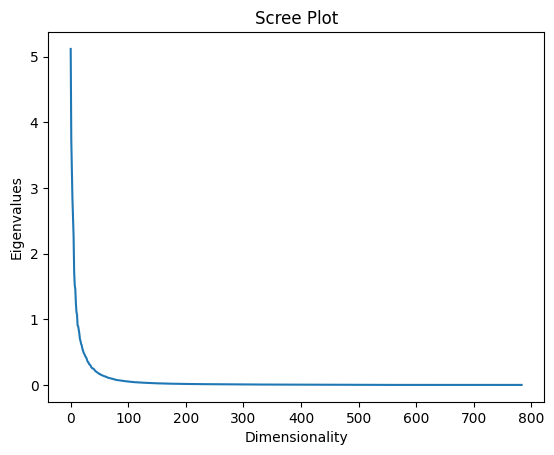

In [154]:
# lets do a scree plot to view eigenvalues:
plt.plot(eigenvalues)
plt.xlabel('Dimensionality')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

In [155]:
# Using this, we want to take cut out most dimensions where eigenvalues are closest to 0:

# lets try d = 90

top_eigenvectors = eigenvectors[:, :90]
features_pca = np.dot(features.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features.view(-1, 28 * 28).numpy().dot(top_eigenvectors), labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 90: {accuracy * 100:.2f}%')



ValueError: Complex data not supported
[[-3.87895452+0.j -0.62961559+0.j -1.24062249+0.j ...  0.37090259+0.j
   0.0499039 +0.j -0.56578305+0.j]
 [-4.9482789 +0.j -0.10051405+0.j  1.82497409+0.j ... -0.35825592+0.j
  -0.28848606+0.j -0.11666095+0.j]
 [ 0.62456308+0.j -2.89567003+0.j  2.16542742+0.j ...  0.11480043+0.j
   0.39103047+0.j  0.1090673 +0.j]
 ...
 [-7.74606021+0.j -1.70969164+0.j  3.93920483+0.j ... -0.15624143+0.j
  -0.25276947+0.j -0.12432953+0.j]
 [-6.05845876+0.j -4.26704566+0.j  4.0789865 +0.j ...  0.24269877+0.j
   0.29682417+0.j -0.24937864+0.j]
 [-2.21837206+0.j  1.39129954+0.j  1.7959887 +0.j ... -0.181731  +0.j
   0.02029315+0.j  0.08750618+0.j]]


In [ ]:
# d = 20:

top_eigenvectors = eigenvectors[:, :20]
features_pca = np.dot(features.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features.view(-1, 28 * 28).numpy().dot(top_eigenvectors), labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: 87.49%


c:\Users\koola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# d = 5:

top_eigenvectors = eigenvectors[:, :5]
features_pca = np.dot(features.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features.view(-1, 28 * 28).numpy().dot(top_eigenvectors), labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: {accuracy * 100:.2f}%')

Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: 67.04%


c:\Users\koola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q4. PCA for cluster visualization

In [199]:
from tqdm import tqdm
# MNIST Dataset: 

# From torch vision
digits = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())


In [225]:
# run PCA on the data

pca = PCA(n_components=3)

features_pca = pca.fit_transform(digits.data.view(-1, 28 * 28).numpy())


# import kmeans library
from sklearn.cluster import KMeans

# Using sklearn's KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features_pca)



KMeans(n_clusters=10, random_state=42)

Text(0.5, 0.92, '3D PCA Visualization of MNIST Data with KMeans Clustering')

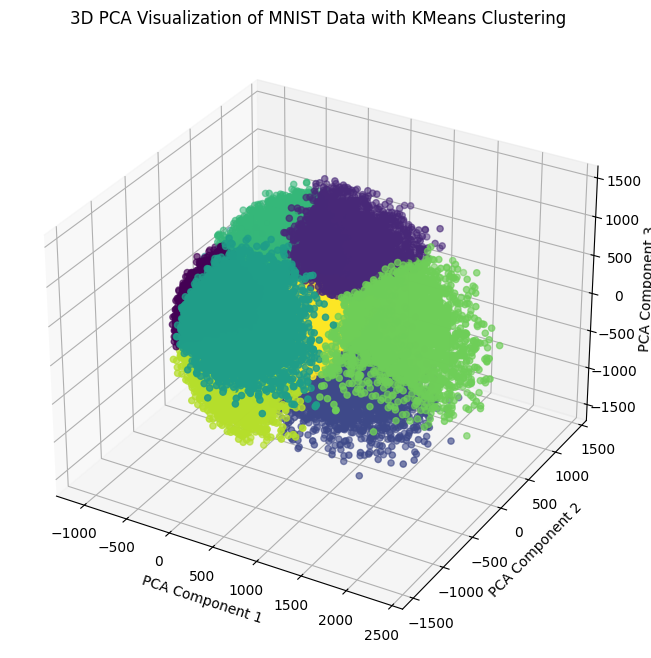

In [226]:
# plot resulting clusters in 3-d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=kmeans.labels_, cmap='viridis', marker='o')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA Visualization of MNIST Data with KMeans Clustering')



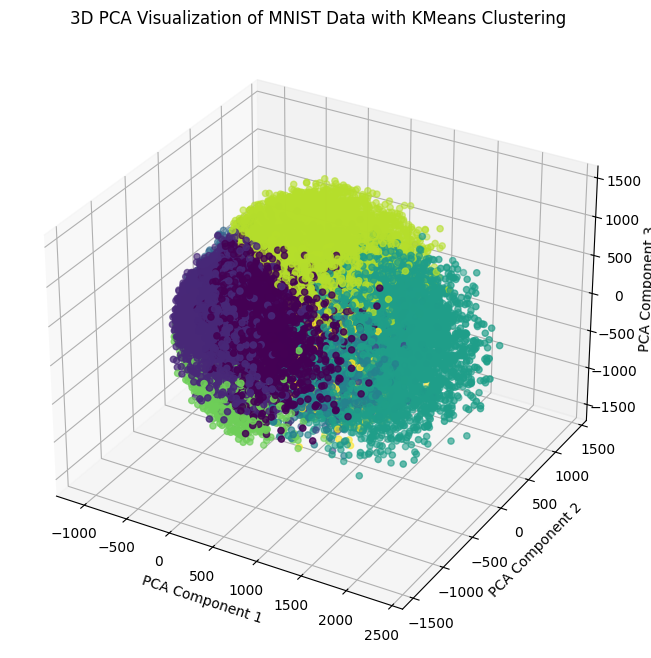

In [236]:
# perform again with d = 20
pca = PCA(n_components=100)
features_pca = pca.fit_transform(digits.data.view(-1, 28 * 28).numpy())
# Using sklearn's KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features_pca)
# plot resulting clusters in 3-d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=kmeans.labels_, cmap='viridis', marker='o')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA Visualization of MNIST Data with KMeans Clustering')
# show the plot
plt.show()


Text(0, 0.5, 'PCA Component 2')

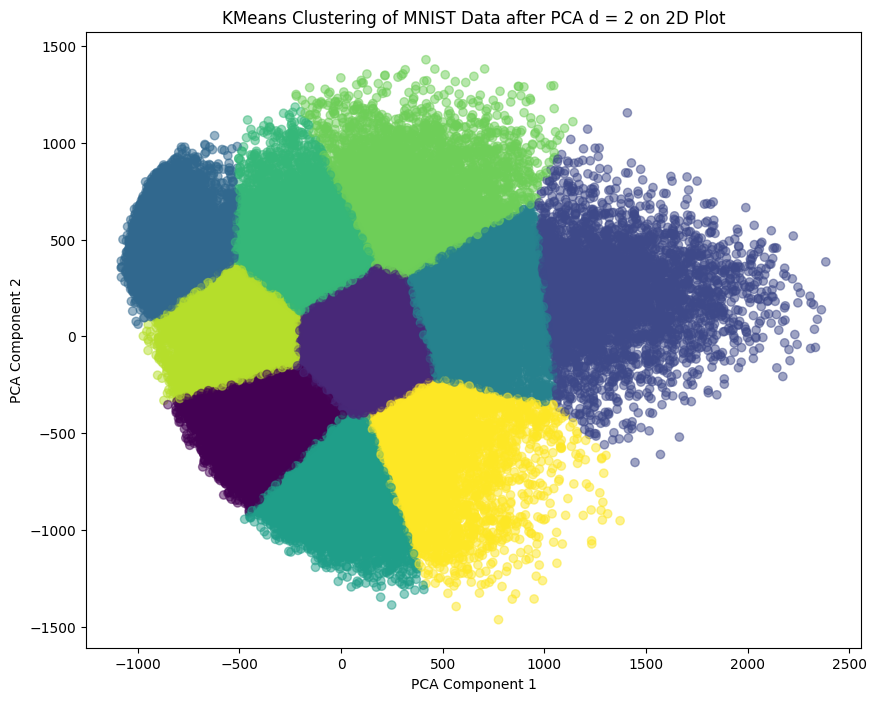

In [237]:
# plot in 2-d
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)
# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.title('KMeans Clustering of MNIST Data after PCA d = 2 on 2D Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


Text(0, 0.5, 'PCA Component 2')

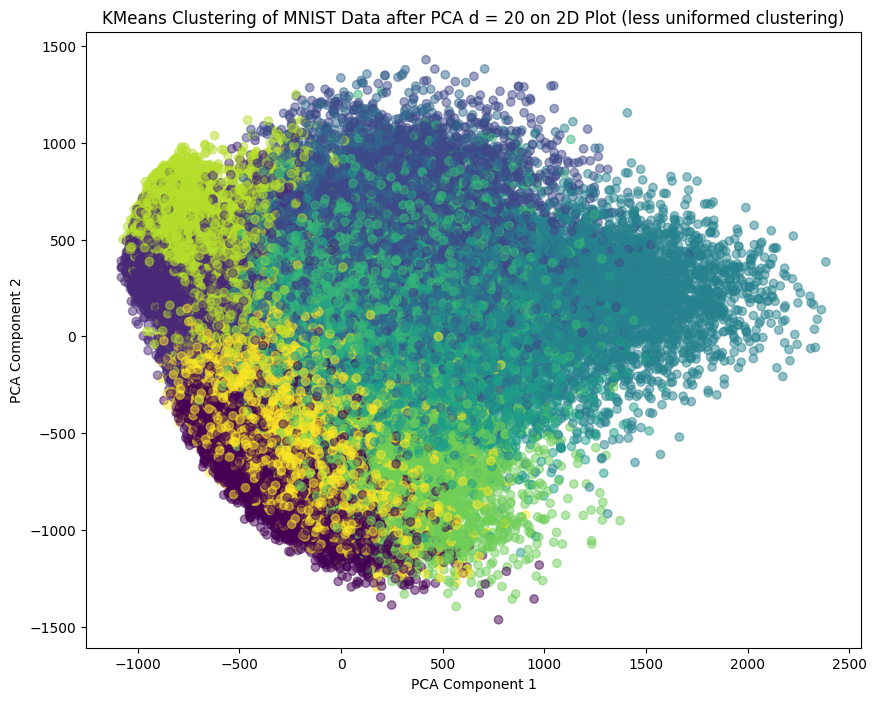

In [238]:
# dimensionality = 20

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)
# Perform PCA to reduce the dimensionality to 20
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.title('KMeans Clustering of MNIST Data after PCA d = 20 on 2D Plot (less uniformed clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

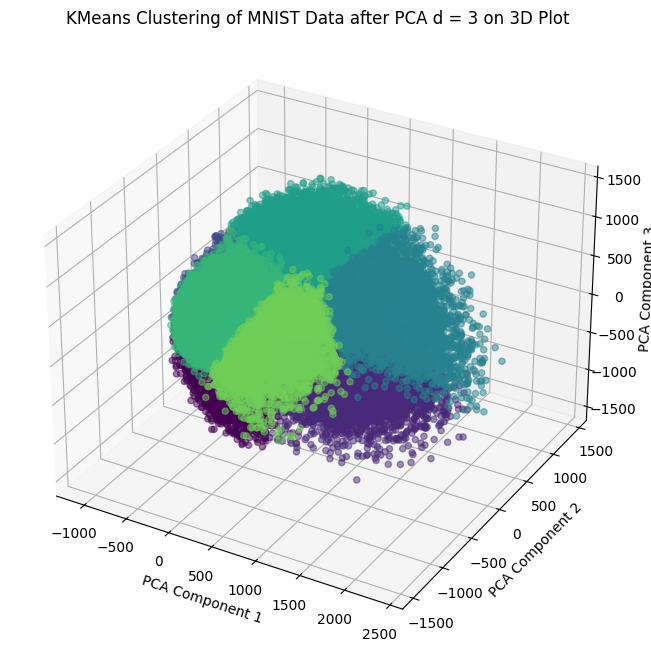

In [239]:
# reduce dimensionality to 3, then plot in 3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


# Perform PCA to reduce the dimensionality to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)
# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
ax.set_title('KMeans Clustering of MNIST Data after PCA d = 3 on 3D Plot')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


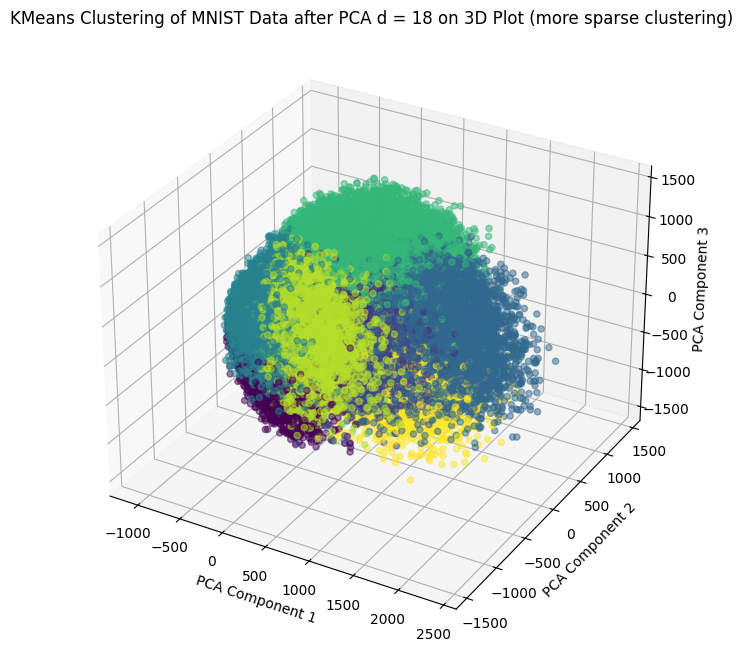

In [240]:
# reduce dimensionality to 3, then plot in 3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


# Perform PCA to reduce the dimensionality to 4
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)
# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
ax.set_title('KMeans Clustering of MNIST Data after PCA d = 18 on 3D Plot (more sparse clustering)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


Text(0, 0.5, 'PCA Component 2')

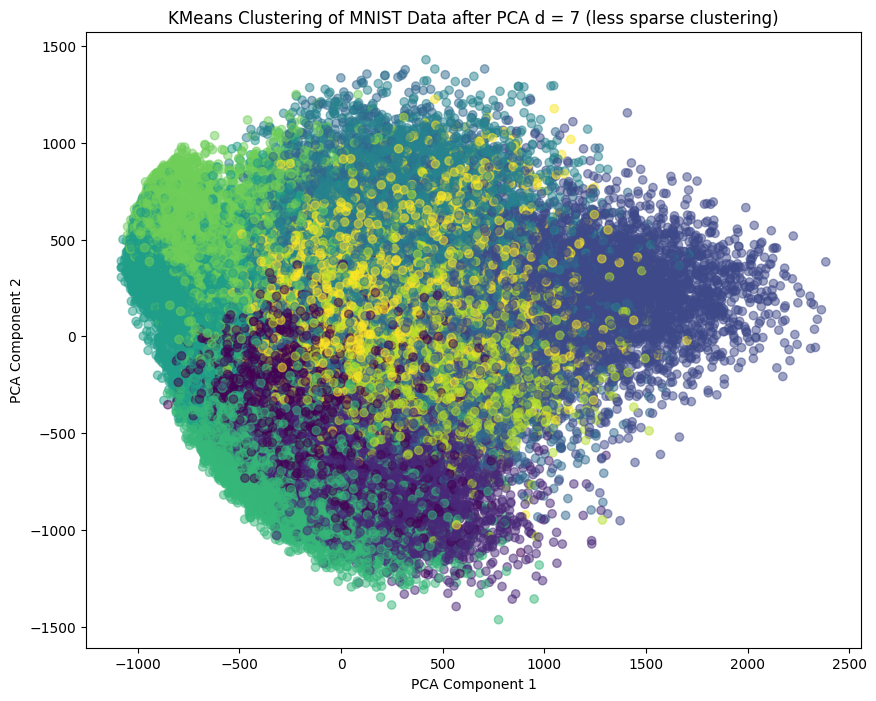

In [241]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)
# Perform PCA to reduce the dimensionality to 7
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.title('KMeans Clustering of MNIST Data after PCA d = 7 (less sparse clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')